# РК ИУ5-61Б 

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('investments_VC.csv', sep = ';' )

In [3]:
data.head()

,status,funding_rounds,founded_year
0,acquired,1,2012.0
1,operating,2,NaN
2,operating,1,2012.0
3,operating,1,2011.0
4,operating,2,2014.0


In [4]:
data

,status,funding_rounds,founded_year
0,acquired,1,2012.0
1,operating,2,NaN
2,operating,1,2012.0
3,operating,1,2011.0
4,operating,2,2014.0
...,...,...,...
49433,operating,1,2013.0
49434,operating,1,NaN
49435,operating,5,2012.0
49436,operating,1,NaN


In [5]:
data.dtypes

status             object
funding_rounds      int64
founded_year      float64
dtype: object

In [6]:
data['Is']=data.status.replace({'acquired':0,'operating':1, 'closed':2})
data.drop('status', axis = 1, inplace = True)


In [7]:
data.isnull().sum()
# проверим есть ли пропущенные значения

funding_rounds        0
founded_year      10956
Is                 1314
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   funding_rounds  49438 non-null  int64  
 1   founded_year    38482 non-null  float64
 2   Is              48124 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.1 MB


In [9]:
data.head()

,funding_rounds,founded_year,Is
0,1,2012.0,0.0
1,2,NaN,1.0
2,1,2012.0,1.0
3,1,2011.0,1.0
4,2,2014.0,1.0


In [10]:
# Заполняем отсутствующие значения 
data['founded_year'] = data['founded_year'].replace(0,np.nan)
data['founded_year'] = data['founded_year'].fillna(data['founded_year'].mean())
data['Is'] = data['Is'].replace(0,np.nan)
data['Is'] = data['Is'].fillna(data['Is'].mean())

<AxesSubplot:>

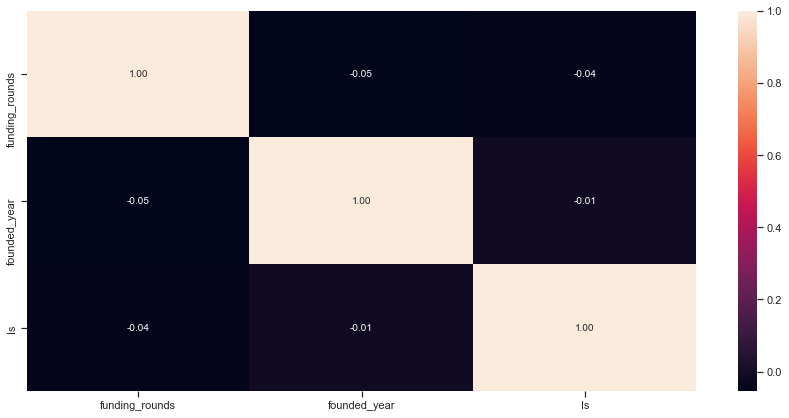

In [11]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [12]:
X = data.drop(['founded_year'], axis = 1)
Y = data.founded_year
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    funding_rounds        Is
0               1  1.058584
1               2  1.000000
2               1  1.000000
3               1  1.000000
4               2  1.000000 

Выходные данные:

 0    2012.000000
1    2007.359129
2    2012.000000
3    2011.000000
4    2014.000000
Name: founded_year, dtype: float64


In [13]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

        funding_rounds   Is
32887               4  1.0
30243               1  1.0
33789               1  1.0
7537                2  1.0
24911               1  1.0 

Входные параметры тестовой выборки:

        funding_rounds        Is
23184               2  1.000000
11254               1  1.000000
35091               1  1.058584
23796               1  1.000000
33448               2  1.000000 

Выходные параметры обучающей выборки:

 32887    2010.000000
30243    2007.359129
33789    2009.000000
7537     2000.000000
24911    2011.000000
Name: founded_year, dtype: float64 

Выходные параметры тестовой выборки:

 23184    2011.000000
11254    1990.000000
35091    2007.359129
23796    2012.000000
33448    2000.000000
Name: founded_year, dtype: float64


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [15]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

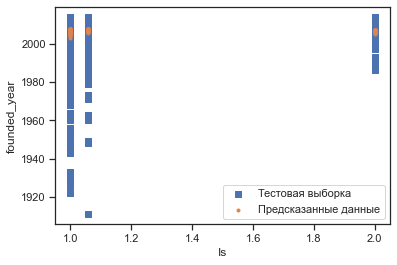

In [16]:
plt.scatter(X_test.Is, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.Is, lr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Is')
plt.ylabel ('founded_year')
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [19]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 3.7929116173190853
Средняя квадратичная ошибка: 45.257190318866826
Median absolute error: 3.085131425064901
Коэффициент детерминации: 0.02337566780947664


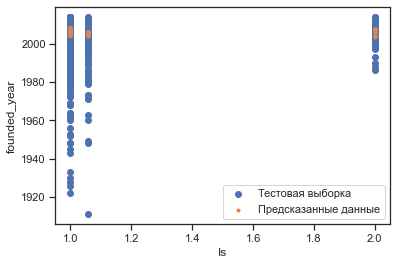

In [20]:
plt.scatter(X_test.Is, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.Is, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Is')
plt.ylabel('founded_year')
plt.show()